## CMS Medicare Outpatient Utilization Analysis (2023)

This project analyzes Medicare outpatient utilization patterns using CMS Program Statistics
(MDCR OUTPATIENT 5). The analysis focuses on utilization by service type, highlighting
differences in volume across outpatient services such as emergency room, laboratory,
clinic, and pharmacy care.

Data preparation required normalization of multi-row CMS Excel headers, removal of
aggregate and non-data rows, and conversion of utilization fields to numeric formats.
Utilization metrics were computed in Python (pandas) and independently validated using
SQL (SQLite) to ensure consistency and transparency.

**Tools:** Python, pandas, matplotlib, SQLite  
**Data Source:** CMS Program Statistics – Medicare Outpatient Facilities

In [8]:
import pandas as pd

df = pd.read_excel("MDCR OUTPT_CPS_09UOT_2023.xlsx")


In [9]:
import sys
!{sys.executable} -m pip install openpyxl

In [11]:
df.columns.tolist()[:40]

['Original Medicare - Outpatient Facility Utilization', 'Unnamed: 1']

In [12]:
df_raw = pd.read_excel(
    "MDCR OUTPT_CPS_09UOT_2023.xlsx",
    header=None
)

df_raw.head(15)

,0,1
0,Original Medicare - Outpatient Facility Utiliz...,NaN
1,Table Name,Description
2,MDCR OUTPATIENT 1_CPS_09UOT,"Medicare Outpatient Facilities: Utilization, ..."
3,MDCR OUTPATIENT 2_CPS_09UOT,"Medicare Outpatient Facilities: Utilization, ..."
4,MDCR OUTPATIENT 3_CPS_09UOT,"Medicare Outpatient Facilities: Utilization, ..."
5,MDCR OUTPATIENT 4_CPS_09UOT,Medicare Outpatient Facilities: Utilization a...
6,MDCR OUTPATIENT 5_CPS_09UOT,Medicare Outpatient Facilities: Utilization f...
7,MDCR OUTPATIENT 6_CPS_09UOT,Medicare Outpatient Prospective Payment System...
8,MDCR OUTPATIENT 7_CPS_09UOT,Medicare Outpatient Prospective Payment System...
9,MDCR OUTPATIENT 8_CPS_09UOT,Medicare Outpatient Prospective Payment System...


In [13]:
import pandas as pd

xls = pd.ExcelFile("MDCR OUTPT_CPS_09UOT_2023.xlsx")
xls.sheet_names

['Table of Contents',
 'MDCR OUTPATIENT 1_CPS_09UOT',
 'MDCR OUTPATIENT 2_CPS_09UOT',
 'MDCR OUTPATIENT 3_CPS_09UOT',
 'MDCR OUTPATIENT 4_CPS_09UOT',
 'MDCR OUTPATIENT 5_CPS_09UOT',
 'MDCR OUTPATIENT 6_CPS_09UOT',
 'MDCR OUTPATIENT 7_CPS_09UOT',
 'MDCR OUTPATIENT 8_CPS_09UOT',
 'MDCR OUTPATIENT 9_CPS_09UOT',
 'MDCR OUTPATIENT 10_CPS_09UOT',
 'MDCR OUTPATIENT 11_CPS_09UOT']

In [14]:
df = pd.read_excel(
    "MDCR OUTPT_CPS_09UOT_2023.xlsx",
    sheet_name="MDCR OUTPATIENT 5_CPS_09UOT"
)

df.shape
df.head()

,Medicare Outpatient Facilities,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Medicare Outpatient Facilities: Utilization f...,NaN,NaN,NaN,NaN
1,"Type of Service, Calendar Year 2023",NaN,NaN,NaN,NaN
2,Type of Outpatient Facility and Type of Service,Total Persons With Utilization,Total Visits¹,Visits per Original Medicare Part B Enrollee²,Visits per Person With Utilization
3,NaN,NaN,NaN,NaN,NaN
4,Total -- All Facilities,21972757,241335286,8.431242,10.983387


In [15]:
df_raw = pd.read_excel(
    "MDCR OUTPT_CPS_09UOT_2023.xlsx",
    sheet_name="MDCR OUTPATIENT 5_CPS_09UOT",
    header=None
)

df_raw.head(15)


,0,1,2,3,4
0,Medicare Outpatient Facilities,NaN,NaN,NaN,NaN
1,Medicare Outpatient Facilities: Utilization f...,NaN,NaN,NaN,NaN
2,"Type of Service, Calendar Year 2023",NaN,NaN,NaN,NaN
3,Type of Outpatient Facility and Type of Service,Total Persons With Utilization,Total Visits¹,Visits per Original Medicare Part B Enrollee²,Visits per Person With Utilization
4,NaN,NaN,NaN,NaN,NaN
5,Total -- All Facilities,21972757,241335286,8.431242,10.983387
6,NaN,NaN,NaN,NaN,NaN
7,Total -- Hospital Outpatient,NaN,NaN,NaN,NaN
8,All Types of Service,19764698,140232618,4.899139,7.095106
9,Clinic,7031232,29665930,1.036403,4.219165


In [16]:
df.columns.tolist()

['Medicare Outpatient Facilities',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4']

## Reload with correct header 

In [17]:
df = pd.read_excel(
    "MDCR OUTPT_CPS_09UOT_2023.xlsx",
    sheet_name="MDCR OUTPATIENT 5_CPS_09UOT",
    header=3
)

df.head()
df.columns.tolist()

['Type of Outpatient Facility and Type of Service',
 'Total Persons With Utilization',
 'Total Visits¹',
 'Visits per Original Medicare Part B Enrollee²',
 'Visits per Person With Utilization']

## Clean column names

In [18]:
df = df.rename(columns={
    df.columns[0]: "facility_service_type",
    df.columns[1]: "persons_with_utilization",
    df.columns[2]: "total_visits",
    df.columns[3]: "visits_per_partb_enrollee",
    df.columns[4]: "visits_per_person"
})

df.head(10)

,facility_service_type,persons_with_utilization,total_visits,visits_per_partb_enrollee,visits_per_person
0,NaN,NaN,NaN,NaN,NaN
1,Total -- All Facilities,21972757.0,241335286.0,8.431242,10.983387
2,NaN,NaN,NaN,NaN,NaN
3,Total -- Hospital Outpatient,NaN,NaN,NaN,NaN
4,All Types of Service,19764698.0,140232618.0,4.899139,7.095106
5,Clinic,7031232.0,29665930.0,1.036403,4.219165
6,Emergency Room,6407848.0,12597052.0,0.440088,1.965879
7,Laboratory,9141416.0,51586103.0,1.802202,5.643120
8,Medical/Surgical Supplies,655909.0,9426692.0,0.329329,14.371951
9,Operating Room,3246315.0,7614681.0,0.266025,2.345638


## Remove non-data rows

In [19]:
df_clean = df[
    df["facility_service_type"].notna() &
    ~df["facility_service_type"].str.contains("Total", case=False)
].copy()

df_clean.head(10)

,facility_service_type,persons_with_utilization,total_visits,visits_per_partb_enrollee,visits_per_person
4,All Types of Service,19764698.0,140232618.0,4.899139,7.095106
5,Clinic,7031232.0,29665930.0,1.036403,4.219165
6,Emergency Room,6407848.0,12597052.0,0.440088,1.965879
7,Laboratory,9141416.0,51586103.0,1.802202,5.643120
8,Medical/Surgical Supplies,655909.0,9426692.0,0.329329,14.371951
9,Operating Room,3246315.0,7614681.0,0.266025,2.345638
10,Pharmacy,3766972.0,32960310.0,1.151495,8.749816
11,Radiology,12428521.0,39310768.0,1.373353,3.162948
12,Rehabilitation,2092830.0,18841747.0,0.658252,9.002999
13,Other Services,8395688.0,40204766.0,1.404586,4.788740


## Clean and sort 

In [22]:
df_clean[["facility_service_type", "total_visits"]].sort_values(
    "total_visits", ascending=False
).head(10)

,facility_service_type,total_visits
4,All Types of Service,140232618.0
22,All Types of Service,83548841.0
7,Laboratory,51586103.0
13,Other Services,40204766.0
11,Radiology,39310768.0
28,Rehabilitation,36774056.0
10,Pharmacy,32960310.0
23,ESRD,32400847.0
5,Clinic,29665930.0
26,Pharmacy,20659337.0


## Aggregate utilization by service 

In [23]:
import matplotlib.pyplot as plt
from pathlib import Path

# Aggregate
service_visits = (
    df_clean.groupby("facility_service_type", as_index=False)
    .agg(total_visits=("total_visits", "sum"))
    .sort_values("total_visits", ascending=False)
)

service_visits

,facility_service_type,total_visits
1,All Types of Service,241335286.0
5,Laboratory,70175903.0
13,Rehabilitation,55615803.0
10,Pharmacy,53619647.0
2,Clinic,46547843.0
8,Other Services,42255950.0
12,Radiology,39707320.0
3,ESRD,32400847.0
6,Medical/Surgical Supplies,17322825.0
4,Emergency Room,12597052.0


## Plot (PNG) 

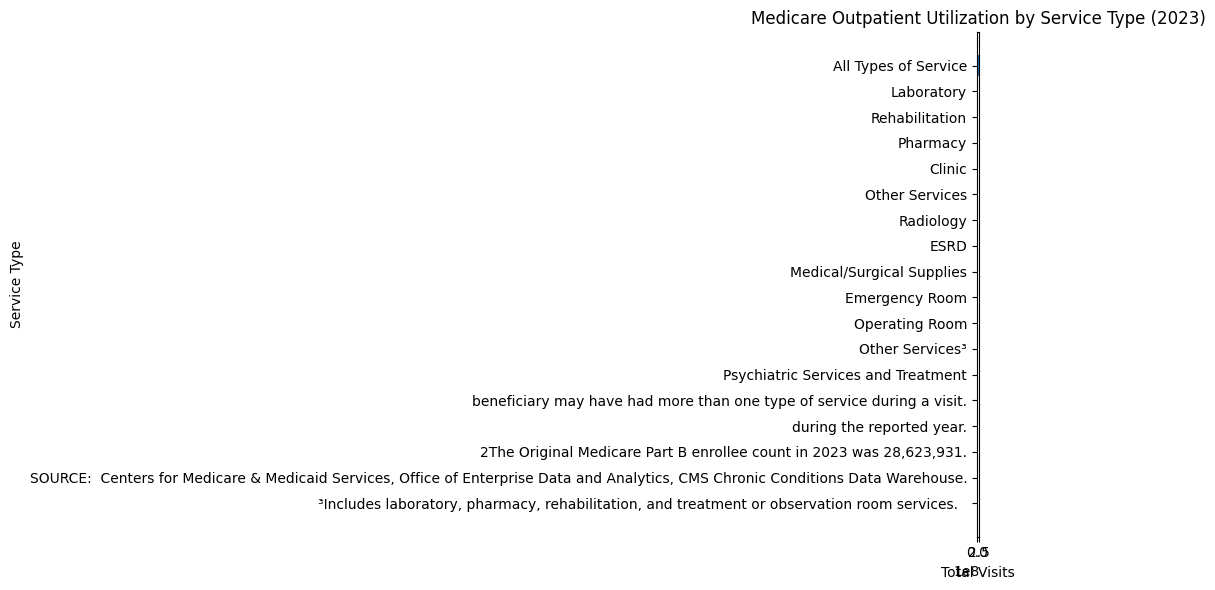

In [24]:
# Output directory
OUT_DIR = Path("outputs")
OUT_DIR.mkdir(exist_ok=True)

plt.figure(figsize=(10, 6))
plt.barh(
    service_visits["facility_service_type"],
    service_visits["total_visits"]
)
plt.gca().invert_yaxis()

plt.title("Medicare Outpatient Utilization by Service Type (2023)")
plt.xlabel("Total Visits")
plt.ylabel("Service Type")

plt.tight_layout()
plt.savefig(OUT_DIR / "cms_outpatient_utilization_by_service.png", dpi=150)
plt.show()

Force Numeric Conversions

In [25]:
df_clean["total_visits"] = (
    df_clean["total_visits"]
    .astype(str)
    .str.replace(",", "", regex=False)
)

df_clean["total_visits"] = pd.to_numeric(
    df_clean["total_visits"],
    errors="coerce"
)

Confirm conversions 

In [26]:
df_clean["total_visits"].describe()
df_clean.dtypes

facility_service_type            str
persons_with_utilization     float64
total_visits                 float64
visits_per_partb_enrollee    float64
visits_per_person            float64
dtype: object

Keep only real service rows

In [27]:
exclude_terms = [
    "All Types",
    "Total",
    "Facility"
]

df_services = df_clean[
    ~df_clean["facility_service_type"].str.contains(
        "|".join(exclude_terms),
        case=False,
        na=False
    )
].copy()

df_services.head()

,facility_service_type,persons_with_utilization,total_visits,visits_per_partb_enrollee,visits_per_person
5,Clinic,7031232.0,29665930.0,1.036403,4.219165
6,Emergency Room,6407848.0,12597052.0,0.440088,1.965879
7,Laboratory,9141416.0,51586103.0,1.802202,5.643120
8,Medical/Surgical Supplies,655909.0,9426692.0,0.329329,14.371951
9,Operating Room,3246315.0,7614681.0,0.266025,2.345638


Limit to top services provided

In [29]:
service_visits = (
    df_services.groupby("facility_service_type", as_index=False)
    .agg(total_visits=("total_visits", "sum"))
    .sort_values("total_visits", ascending=False)
    .head(8)   # 👈 key fix
)

Replot

<Figure size 640x480 with 0 Axes>

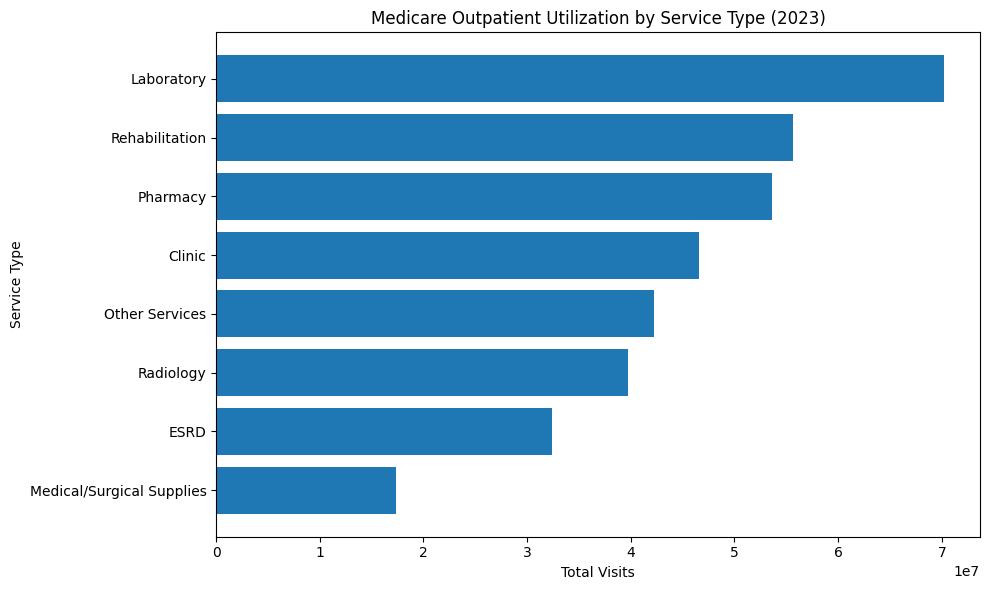

In [35]:
import matplotlib.pyplot as plt
from pathlib import Path

plt.suptitle("Original Medicare Beneficiaries", fontsize=10, y=0.94)

OUT_DIR = Path("outputs")
OUT_DIR.mkdir(exist_ok=True)

plt.figure(figsize=(10, 6))
plt.barh(
    service_visits["facility_service_type"],
    service_visits["total_visits"]
)
plt.gca().invert_yaxis()

plt.title("Medicare Outpatient Utilization by Service Type (2023)")
plt.xlabel("Total Visits")
plt.ylabel("Service Type")

plt.tight_layout()
plt.savefig(
    OUT_DIR / "cms_outpatient_utilization_by_service.png",
    dpi=150
)
plt.show()